In [3]:
%pip install umap
import sklearn.datasets
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import pandas as pd
import numpy as np
import umap
#import umap.plot
#https://umap-learn.readthedocs.io/en/latest/composing_models.html

  Using cached umap-0.1.1-py3-none-any.whl

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
data=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
data

,indx,kmer,mean_1,mean_2,mean_3,mean_4,mean_5,std_1,std_2,std_3,...,mdintense_2,mdintense_3,mdintense_4,mdintense_5,L-1,L-2,L-3,L-4,L-5,label
0,260,AGTTC,0.513199,0.397293,-0.850444,-0.837177,-0.786233,0.047088,0.272815,0.031234,...,0.471305,-0.846254,-0.839970,-0.768751,6,81,6,15,104,1
1,259,AGTTC,0.589209,0.568374,-0.717482,-0.762448,-0.789418,0.062266,0.080098,0.038712,...,0.579342,-0.727349,-0.763294,-0.799239,6,32,6,15,90,1
2,243,AGTTC,0.458838,0.109656,-0.797939,-0.820008,-0.756034,0.149853,0.419986,0.034345,...,0.190347,-0.796560,-0.817250,-0.755180,13,6,6,33,63,1
3,260,AGTTC,0.457595,0.472804,-0.688376,-0.681815,-0.679743,0.060894,0.174125,0.025067,...,0.513802,-0.686393,-0.686393,-0.696311,6,78,6,13,108,1
4,260,AGTTC,0.528384,0.423719,-0.713185,-0.825872,-0.800544,0.029393,0.277885,0.162593,...,0.522379,-0.768558,-0.826600,-0.792575,6,51,6,11,108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,260,AGTTC,0.787659,0.405793,-0.611869,-0.739305,-0.605124,0.169036,0.279195,0.138040,...,0.463995,-0.667700,-0.744655,-0.604325,32,14,6,11,17,0
2629,161,AGTTC,0.396310,0.499622,-0.619268,-0.546544,-0.762006,0.090910,0.031997,0.130815,...,0.500937,-0.642935,-0.607435,-0.786905,39,6,6,16,16,0
2630,240,AGTTC,0.589990,0.614284,-0.632994,-0.789089,-0.753708,0.172348,0.280588,0.188418,...,0.688070,-0.685807,-0.796713,-0.751445,6,40,6,19,6,0
2631,260,AGTTC,0.661435,0.551367,-0.694797,-0.734620,-0.571503,0.110638,0.231089,0.049018,...,0.548295,-0.676666,-0.739763,-0.576580,33,34,6,11,6,0


In [5]:
data_features=data.iloc[:,2:data.shape[1]-1]
data_features

,mean_1,mean_2,mean_3,mean_4,mean_5,std_1,std_2,std_3,std_4,std_5,mdintense_1,mdintense_2,mdintense_3,mdintense_4,mdintense_5,L-1,L-2,L-3,L-4,L-5
0,0.513199,0.397293,-0.850444,-0.837177,-0.786233,0.047088,0.272815,0.031234,0.029964,0.071119,0.509009,0.471305,-0.846254,-0.839970,-0.768751,6,81,6,15,104
1,0.589209,0.568374,-0.717482,-0.762448,-0.789418,0.062266,0.080098,0.038712,0.037672,0.081182,0.606829,0.579342,-0.727349,-0.763294,-0.799239,6,32,6,15,90
2,0.458838,0.109656,-0.797939,-0.820008,-0.756034,0.149853,0.419986,0.034345,0.031689,0.088160,0.473798,0.190347,-0.796560,-0.817250,-0.755180,13,6,6,33,63
3,0.457595,0.472804,-0.688376,-0.681815,-0.679743,0.060894,0.174125,0.025067,0.042501,0.065158,0.478094,0.513802,-0.686393,-0.686393,-0.696311,6,78,6,13,108
4,0.528384,0.423719,-0.713185,-0.825872,-0.800544,0.029393,0.277885,0.162593,0.018993,0.052775,0.526382,0.522379,-0.768558,-0.826600,-0.792575,6,51,6,11,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,0.787659,0.405793,-0.611869,-0.739305,-0.605124,0.169036,0.279195,0.138040,0.044008,0.038886,0.765025,0.463995,-0.667700,-0.744655,-0.604325,32,14,6,11,17
2629,0.396310,0.499622,-0.619268,-0.546544,-0.762006,0.090910,0.031997,0.130815,0.250404,0.085589,0.416133,0.500937,-0.642935,-0.607435,-0.786905,39,6,6,16,16
2630,0.589990,0.614284,-0.632994,-0.789089,-0.753708,0.172348,0.280588,0.188418,0.045102,0.012737,0.629222,0.688070,-0.685807,-0.796713,-0.751445,6,40,6,19,6
2631,0.661435,0.551367,-0.694797,-0.734620,-0.571503,0.110638,0.231089,0.049018,0.025361,0.039618,0.678841,0.548295,-0.676666,-0.739763,-0.576580,33,34,6,11,6


In [6]:
X, y = data_features, data[["label"]].values.flatten()

In [7]:
import umap
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Scale
pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())

# Encode the target to numeric
y_encoded = pd.factorize(y)[0]

In [ ]:
%pip uninstall umap
%pip install umap-learn

# https://github.com/lmcinnes/umap/issues/828
# https://www.kaggle.com/code/bextuychiev/beautiful-umap-tutorial-on-100-dimensional-data

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /home/jiayi/miniconda3/lib/python3.9/site-packages/umap-0.1.1.dist-info/*
    /home/jiayi/miniconda3/lib/python3.9/site-packages/umap/*
Proceed (Y/n)? 

In [8]:
%%time

import umap  # pip install umap-learn

manifold = umap.UMAP().fit(X, y)
X_reduced = manifold.transform(X)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 3min 6s, sys: 2.57 s, total: 3min 8s
Wall time: 13.8 s


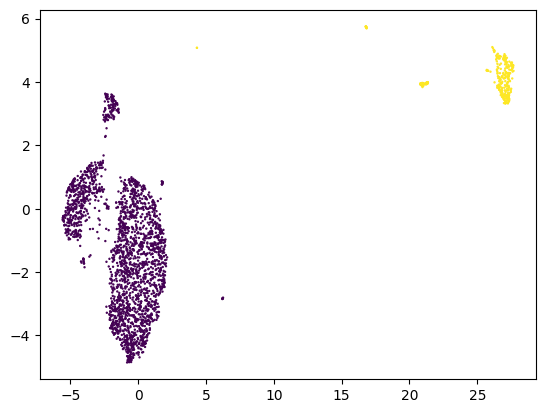

In [10]:
#import matplotlib as plt
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=0.5)

In [11]:
import umap
from sklearn.preprocessing import PowerTransformer

# Scale
pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())

# Encode the target to numeric
y_encoded = pd.factorize(y)[0]

In [12]:
%%time

manifold = umap.UMAP().fit(X, y_encoded)

CPU times: user 2min 42s, sys: 1.74 s, total: 2min 44s
Wall time: 8.9 s


In [16]:
%pip install datashader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 1.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.5/979.5 kB 7.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 7.4 MB/s eta 0:00:00
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59422 sha256=8b1c4b240c87bedbef6b0f4cdd5d7c06dbf6092a5b7500d7d49d4c8c2616553f
  Stored in directory: /home/jiayi/.cache/pip/wheels/5e/c6/b3/929eb5abf9a267f5d4280fdd70135175baccc4387b35748bb8
Successfully b

In [19]:
%pip install bokeh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 1.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
%pip install holoviews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 3.6 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 2.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 2.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.1.0
    Uninstalling bokeh-3.1.0:
      Successfully uninstalled bokeh-3.1.0

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install -U ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.6/797.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ipython
    Found existing installation: ipython 8.9.0
    Uninstalling ipython-8.9.0:
      Successfully uninstalled ipython-8.9.0

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd

ImportError: cannot import name 'Box' from 'bokeh.models' (/home/jiayi/miniconda3/lib/python3.9/site-packages/bokeh/models/__init__.py)

In [23]:
import umap.plot  # pip install umap-learn[plot]

umap.plot.points(manifold, labels=y, theme="fire")

/home/jiayi/miniconda3/lib/python3.9/site-packages/umap/plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [27]:
import pandas as pd
import datashader as ds
    import datashader.transfer_functions as tf
    import datashader.bundling as bd
    import matplotlib.pyplot as plt
    import colorcet
    import matplotlib.colors
    import matplotlib.cm

    import bokeh.plotting as bpl
    import bokeh.transform as btr
    import holoviews as hv
    import holoviews.operation.datashader as hd

IndentationError: unexpected indent (1785505428.py, line 2)

In [7]:
scaled_numeric = RobustScaler().fit_transform(numeric)
scaled_numeric[:4]

array([[-0.49826394, -0.98491654, -0.50671311, -0.60144928],
       [-0.13329609, -0.68984116, -0.13353184, -0.48550725],
       [ 0.33237629, -0.29483164,  0.35663112, -0.39855072],
       [ 0.71563138,  0.30230062,  0.69404112, -0.56521739]])

In [8]:
numeric_mapper = umap.UMAP(n_neighbors=15, random_state=42).fit(scaled_numeric)

AttributeError: module 'umap' has no attribute 'UMAP'

In [11]:
data=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_tombo.csv')
#print(data)
df = data.groupby(['kmer','label']).agg(coverage = ('indx','count'))
df['indx']=data['indx']
df.to_csv('/home/jiayi/5moU/Code/DL5mou/DeepRead/motif_count.csv')